In [2]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from samer_apikey import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
latitude_and_longitude = tuple(zip(latitude,longitude))

In [4]:
cities = []
country = []

for lat,lon in latitude_and_longitude:
    city = citipy.nearest_city(lat,lon)
    
    cityName = city.city_name
    
    cities.append(cityName)
    
    country.append(city.country_code)

In [5]:
print('There are {} different cities'.format(len(set(cities))))

There are 482 different cities


In [6]:
df_countries = pd.DataFrame({'Cities': cities, 'Country': country})

df_countries['Latitude'] = " "
df_countries['Longitude'] = " "
df_countries['Temperature (F)'] = " "
df_countries['Humidity (%)'] = " "
df_countries['Cloudiness (%)'] = " "
df_countries['Wind Speed (mph)'] = " "

In [7]:
df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')

In [8]:
for index,row in df_countries.iterrows():
    city_name = row['Cities']
    Country_id = row['Country']
    
    api_url = "http://api.openweathermap.org/data/2.5/forecast" \
    "?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_name,Country_id,api_key) 
    
    country_info = requests.get(api_url).json()
    
    print(api_url)
    
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        
        print('Missing weather information...skip')

http://api.openweathermap.org/data/2.5/forecast?q=chokurdakh,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=tasiilaq,gl&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92


C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a futur

http://api.openweathermap.org/data/2.5/forecast?q=bambous virieux,mu&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=bredasdorp,za&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=albany,au&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=pedernales,do&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=jamestown,sh&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=lagoa,pt&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=punta arenas,cl&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=port alfred,za&units=IMPERIAL&mode=json&APPID=45ced158f23

C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pinkp\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pinkp\Anaconda3\lib\s

http://api.openweathermap.org/data/2.5/forecast?q=cidreira,br&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=wenling,cn&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=manado,id&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=cherskiy,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=borujan,ir&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=arraial do cabo,br&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=severo-kurilsk,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=beloha,mg&units=IMPERIAL

http://api.openweathermap.org/data/2.5/forecast?q=safaga,eg&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=dikson,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=kuche,cn&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=tawnat,ma&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=hamilton,bm&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=ust-maya,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=tumannyy,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
Missing weather inform

http://api.openweathermap.org/data/2.5/forecast?q=saskylakh,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=neuruppin,de&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=ahtopol,bg&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=ekhabi,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=aykhal,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=ilovlya,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=chuy,uy&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=necochea,ar&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92


http://api.openweathermap.org/data/2.5/forecast?q=rjukan,no&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=srednekolymsk,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=enkoping,se&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=marienburg,sr&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=quatre cocos,mu&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=sabang,id&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=attawapiskat,ca&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=saint-pierre,pm&units=

http://api.openweathermap.org/data/2.5/forecast?q=jever,de&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=namibe,ao&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=komsomolskiy,ru&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=tarakan,id&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=auki,sb&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=karamea,nz&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=monkey bay,mw&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=jaque,pa&units=IMPERIAL&mode=json&APPI

http://api.openweathermap.org/data/2.5/forecast?q=carutapera,br&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=neuquen,ar&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=cairns,au&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=peterborough,us&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=itarema,br&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=lemesos,cy&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
Missing weather information...skip
http://api.openweathermap.org/data/2.5/forecast?q=mareeba,au&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=akyab,mm&units=IMPERIAL&mode=json

http://api.openweathermap.org/data/2.5/forecast?q=boyolangu,id&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=beni,cd&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=ribeira grande,pt&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=sulangan,ph&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=doka,sd&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=alta floresta,br&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=bandarbeyla,so&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=haverhill,us&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e5

http://api.openweathermap.org/data/2.5/forecast?q=port macquarie,au&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=lardos,gr&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=maloy,no&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=alexandria,eg&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=maningrida,au&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=pingliang,cn&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=erenhot,cn&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab878de1c5f92
http://api.openweathermap.org/data/2.5/forecast?q=turayf,sa&units=IMPERIAL&mode=json&APPID=45ced158f23ca45e535ab8

In [9]:
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Temperature (F)'] = pd.to_numeric(df_countries['Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

In [11]:
df_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,chokurdakh,ru,70.6192,147.9022,85.57,56.0,12.0,9.22
1,tasiilaq,gl,65.6145,-37.6368,39.42,97.0,92.0,0.72
2,bambous virieux,mu,-20.3428,57.7575,71.53,96.0,92.0,12.12
3,bredasdorp,za,-34.5331,20.0428,48.42,100.0,0.0,8.88
4,albany,au,-35.0248,117.8836,64.40,69.0,76.0,11.68


Text(0.5,0,'Latitude')

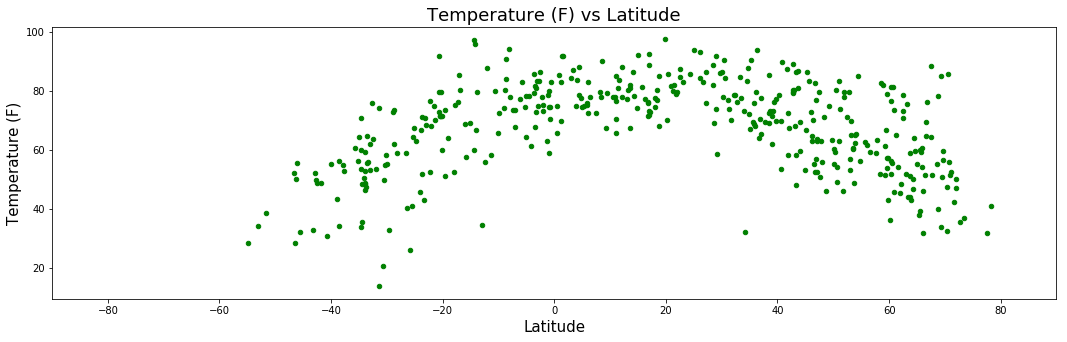

In [13]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries["Latitude"], df_countries["Temperature (F)"], color = 'green', s=20)
plt.title('Temperature (F) vs Latitude', fontsize=18)
plt.xlim(-90,90)
plt.ylabel('Temperature (F)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)

Text(0.5,0,'Latitude')

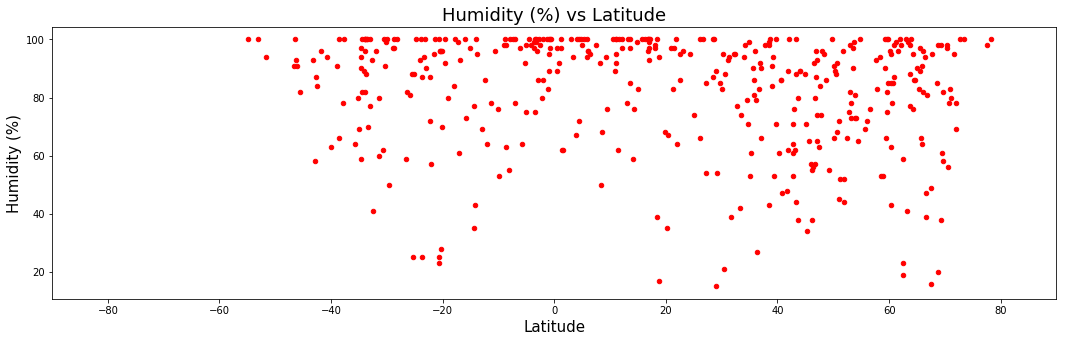

In [15]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries["Latitude"], df_countries["Humidity (%)"], color = 'red', s=20)
plt.title('Humidity (%) vs Latitude', fontsize=18)
plt.xlim(-90,90)
plt.ylabel('Humidity (%)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)

Text(0.5,0,'Latitude')

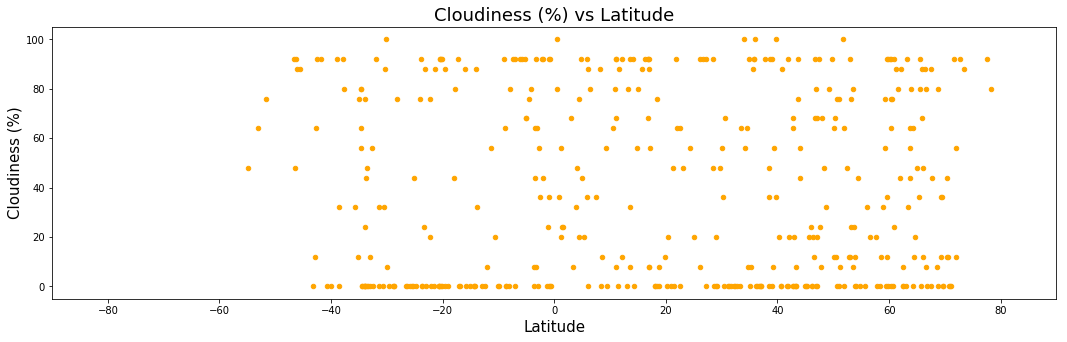

In [16]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries["Latitude"], df_countries["Cloudiness (%)"], color = 'orange', s=20)
plt.title('Cloudiness (%) vs Latitude', fontsize=18)
plt.xlim(-90,90)
plt.ylabel('Cloudiness (%)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)

Text(0.5,0,'Latitude')

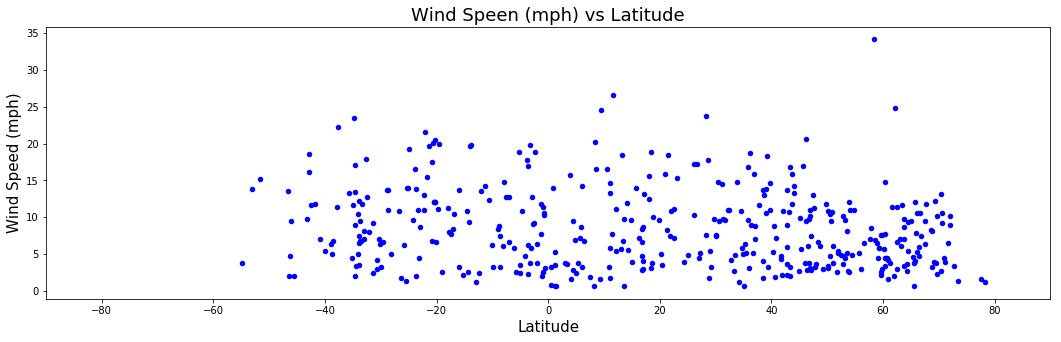

In [19]:
plt.figure(figsize=(18,5))
plt.scatter(df_countries["Latitude"], df_countries["Wind Speed (mph)"], color = 'blue', s=20)
plt.title('Wind Speen (mph) vs Latitude', fontsize=18)
plt.xlim(-90,90)
plt.ylabel('Wind Speed (mph)', fontsize=15)
plt.xlabel('Latitude', fontsize=15)